- 정보 먼저 추출해보고 
- 에러난다면 예외처리하면서 판다스프레임넣어보기.

첫번째 페이지에는 테이블을 둘로 나누는데 호텔 정보
호텔 ID 모으고
데이터 프레임 두개

**3시간 동안 해결해보기

In [3]:
import json
import pandas as pd

In [2]:
try:
    with open('./data/hotels_korea_reviews_text.json') as file:
        a=file.read()
except Exception as e:
    print(e)
    with open('./data/hotels_korea_reviews_text.json',encoding="utf-8") as file:
        a=file.read()
a[:100]

'[\n  {\n    "data": {\n      "page": {\n        "html": {\n          "lang": "ko",\n          "langdir": "'

### 로드 후 길이 재기

In [5]:
b=json.loads(a)
len(b)

9027

In [9]:
b[0] # JSON포매터로 필요한걸 찾아봄 파이썬창에서 구조파악이 어려움.

두가지 테이블을 제시하는대로 DataFrame으로 만들기.
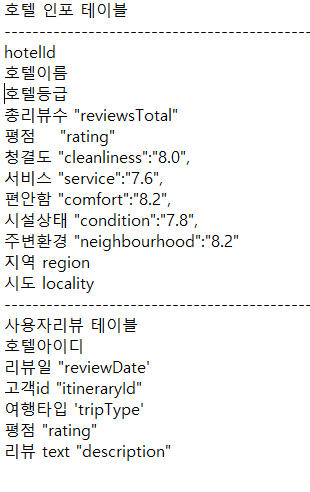

### 처음찾는 데이터(hotelid) 위치 파악 후
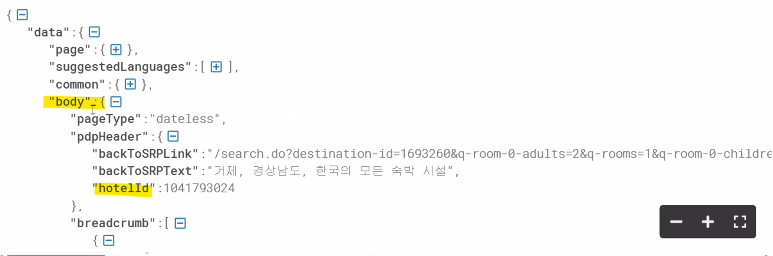
- 파이썬에서 해당키를 출력해본후 맞는값이 나오면 변수에담기
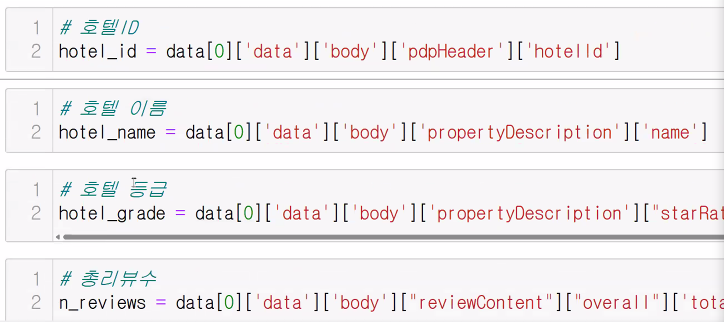

In [21]:
list(b[0]['data']['page']['head'].keys())

['title', 'links', 'metas', 'linkedData']

In [82]:
list(b[0]['data']['body'].keys())

['pageType',
 'pdpHeader',
 'breadcrumb',
 'welcomeRewards',
 'propertyDescription',
 'featuredPrice',
 'topQueryFormCtaText',
 'query',
 'reviewContent',
 'phoneNumbers',
 'miscellaneous']

In [23]:
#호텔이름있는 요소의 인덱스번호 출력.. 실패.
c=b[0]['data']['page']['head']['metas']
c.index('(SangSang Hotel)')

In [26]:
#호텔이름 
c=b[0]['data']['page']['head']['metas'][3]['content']
#뽑은다음 불필요한 글 자름
c.replace(' 이용 후기','')

'거제 상상속의집 (SangSang Hotel)'

In [40]:
# 다른 리뷰도 불러올 수 있는지 확인
c=b[3]['data']['page']['head']['metas'][3]['content']
c.replace(' 이용 후기','')

'서귀포 바다마루 제주 (Badamaru Jeju)'

In [65]:
#호텔아이디
b[0]['data']['page']['head']['links'][-2]


{'href': 'android-app://com.hcom.android/hotelsapp/kr.hotels.com/PPCHotelDetails?hotelid=1041793024&rffrid=seo.hcom.KR.u.www.google.com',
 'rel': 'alternate'}

In [119]:
#호텔아이디(2)대략적인 위치 찾아서 str로 형변 후 split[인덱싱]
str(b[0]['data']['page']['head']['links'][-2]['href']).split('?')[1].split('&')[0].split('=')[1]

'1041793024'

In [80]:
#호텔 등급 - 다른리뷰체크완.
b[0]['data']['body']['propertyDescription']['starRatingTitle']

'3성급'

In [114]:
#지역
b[0]['data']['body']['propertyDescription']['address']['region']

'경상남도'

In [118]:
#시도
b[0]['data']['body']['propertyDescription']['address']['locality']

'거제시'

In [101]:
# 청결도~주변환경 5가지 =d에 담음
list(b[0]['data']['body']['reviewContent']['overall']['ratingAspects'].keys())

['cleanliness', 'service', 'comfort', 'condition', 'neighbourhood']

In [102]:
d=b[0]['data']['body']['reviewContent']['overall']['ratingAspects']
d

{'cleanliness': '8.0',
 'service': '7.6',
 'comfort': '8.2',
 'condition': '7.8',
 'neighbourhood': '8.2'}

In [ ]:
# 이제 찾은 애들을 for 문으로 엮기.


## 사용자리뷰 데이터테이블

In [137]:
# description이 없는 리뷰들
b[0]['data']['body']['reviewContent']['reviews']['hermes']['groups'][1]['items'][5]

{'itineraryId': '8182149302331',
 'brand': 'expedia',
 'genuineMsg': 'Expedia 실제 이용 고객 후기',
 'googleTranslateEnabled': False,
 'tripType': 'other',
 'tripTypeText': '1박 여행',
 'reviewDate': '2020년 6월 18일',
 'reviewDbDate': '1592870400000',
 'reviewer': {'name': '', 'locality': 'kr', 'locale': 'ko_KR'},
 'rating': '8.0',
 'badge': '매우 좋음',
 'summary': '',
 'description': '',
 'response': {'author': '상상속의집',
  'text': '안녕하세요. 상상속의집입니다.\n후한 점수를 남겨주셔서 감사드립니다.'}}

# 사용자리뷰 데이터테이블

In [144]:
# 사용자리뷰 데이터테이블
# description있는 리뷰모음
b[0]['data']['body']['reviewContent']['reviews']['hermes']['groups'][0]['items']

{'itineraryId': '72009037635503',
 'brand': 'expedia',
 'genuineMsg': 'Expedia 실제 이용 고객 후기',
 'googleTranslateEnabled': False,
 'tripType': 'family',
 'tripTypeText': '1박 가족 여행',
 'reviewDate': '2020년 11월 20일',
 'reviewDbDate': '1606003200000',
 'reviewer': {'name': '나미', 'locality': 'kr', 'locale': 'ko_KR'},
 'rating': '10.0',
 'badge': '최고 좋음',
 'summary': '',
 'description': '주차가 객실당 한칸씩 차고가 있는게 굉장히 특이했으며 가장 편리했음.\n간혹 차에 무언가를 두고와서 가지러 가는 경험을 하는데 리조트나 다른 펜션이었다면 주차장까지 내려가는 번거로움이 있었겠지만 이 호텔에서는 객실 바로밑에 주차장이 있어서 주차장이 가장편리 하였다.\n하지만 방음 수준은 최악'}

In [150]:
#description있는 리뷰 단건.
b[0]['data']['body']['reviewContent']['reviews']['hermes']['groups'][0]['items'][0]

{'itineraryId': '72009037635503',
 'brand': 'expedia',
 'genuineMsg': 'Expedia 실제 이용 고객 후기',
 'googleTranslateEnabled': False,
 'tripType': 'family',
 'tripTypeText': '1박 가족 여행',
 'reviewDate': '2020년 11월 20일',
 'reviewDbDate': '1606003200000',
 'reviewer': {'name': '나미', 'locality': 'kr', 'locale': 'ko_KR'},
 'rating': '10.0',
 'badge': '최고 좋음',
 'summary': '',
 'description': '주차가 객실당 한칸씩 차고가 있는게 굉장히 특이했으며 가장 편리했음.\n간혹 차에 무언가를 두고와서 가지러 가는 경험을 하는데 리조트나 다른 펜션이었다면 주차장까지 내려가는 번거로움이 있었겠지만 이 호텔에서는 객실 바로밑에 주차장이 있어서 주차장이 가장편리 하였다.\n하지만 방음 수준은 최악'}

In [151]:
# 리뷰일
reviewDate_=b[0]['data']['body']['reviewContent']['reviews']['hermes']['groups'][0]['items'][0]["reviewDate"]
# 고객 아이디 
itineraryId_=b[0]['data']['body']['reviewContent']['reviews']['hermes']['groups'][0]['items'][0]['itineraryId']

        



2020년 11월 20일 72009037635503


In [158]:
#복잡하게 만든 호텔아이디
f=str(b[0]['data']['page']['head']['links'][-2]['href']).split('?')[1].split('&')[0].split('=')[1]
g=int(f)
g

589827

## 호텔아이디 다시 해봐야겠음.

In [ ]:
#호텔아이디
b[0]['data']['page']['body']

In [10]:
# for h in range(1,100):
#     hotel_id=str(b[h]['data']['page']['head']['links'][-2]['href']).split('?')[1].split('&')[0].split('=')[1]
#     j=[]
#     for hotelid in 


## 전부다 맞게 나온다면 변수에 하나씩 차례대로 어펜드하는 방식으로 나오게된다.

### 대량의 자료에서는 포문에서 반복중에 에러가 나올때 어디쯤에서 난건지 알수있게 하기
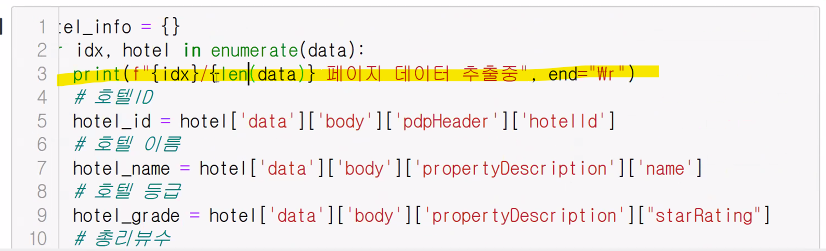
**여기에서 end="\r"(캐리지리턴)으로 지우고다시쓰게하기
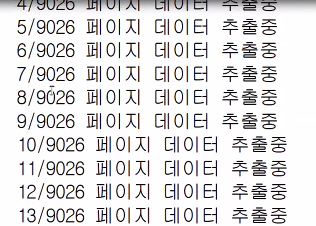
**캐리지리턴안쓰면 이렇게됨.
### 오류난 페이지 체크하고 다시 작업하는식.
### 데이터프레임을 만들었다가 합쳐주는 작업
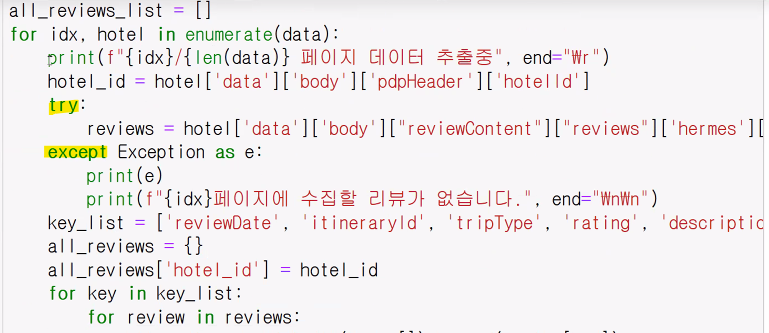


# 0328
**이제 반복문 처리 (영상: 1:10:00대에있음)
![image-4.png](attachment:image-4.png)
- ['overall']이 겹치는 부분만 따로 변수에 담음
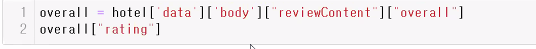

In [ ]:
overall=hotel['data']['body']['reviewContent']['overall']
for key in overall:
    print(key) #들어있는 키들이 쭉나옴

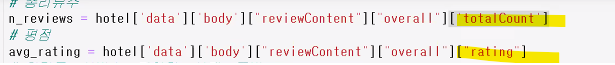
- 필요한 키들 체크

In [ ]:
overall=hotel['data']['body']['reviewContent']['overall']
for key in overall:
    if key in ['totalCount','rating']:
        print(overall[key]) #토탈카운트나 레이팅일경우 값 출력

In [ ]:
#새변수에 dict로 차곡차곡(setdefault.append)담기
temp={}
overall=hotel['data']['body']['reviewContent']['overall']
for key in overall:
    if key in ['totalCount','rating']:
        temp.setdefault(key,[]),append(overall[key])
print(temp)

In [ ]:
#ratingAspect는 조건이다름.
temp={}
overall=hotel['data']['body']['reviewContent']['overall']
for key in overall:
#      print('overall')
    if key in ['totalCount','rating']:
        temp.setdefault(key,[]),append(overall[key])
    elif key=='ratingAspects':
        for ra_key in overall[key].keys():
            print(ra_key)
print(temp)

In [ ]:
#keys 조회 잘되면 
temp={}
overall=hotel['data']['body']['reviewContent']['overall']
for key in overall:
    if key in ['totalCount','rating']:
        temp.setdefault(key,[]),append(overall[key])
    elif key=='ratingAspects':
        for ra_key in overall[key].keys():
            temp.setdefault(ra_key,[]),append(overall[key][ra_keys])
            #

print(temp)

In [ ]:
#전체 페이지가 들어오게 바꾸기(1)
temp={}
overall=hotel['data']['body']['reviewContent']['overall']
for key in overall:
    if key in ['totalCount','rating']:
        temp.setdefault(key,[]),append(overall[key])
    elif key=='ratingAspects':
        for ra_key in overall[key].keys():
            temp.setdefault(ra_key,[]),append(overall[key][ra_keys])

# print(temp)

### 위 내용을 이제 메인이되는 포문에 반영하기
(포문에서 반복적으로 위치가 들어가있으므로)
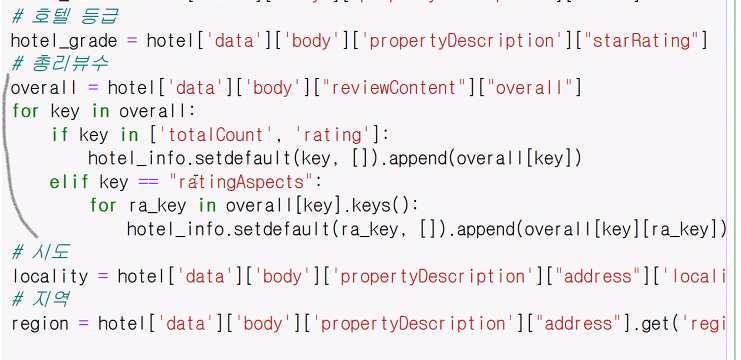
이런식으로 넣어볼 순 있으나 
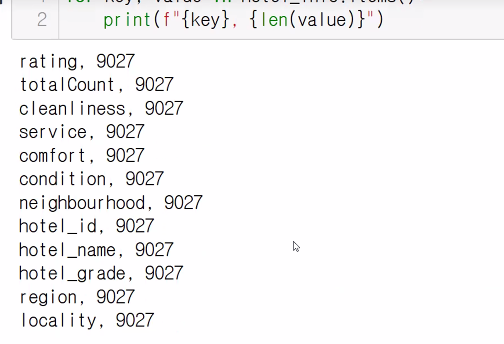
이렇게 일정하지않고 키가 어디는 5 어디는 6인 상황에서 넣은것이므로 아래와같이 키를 뽑아본다음 그 키들을 넣어서 수정해야함.

In [ ]:
#전체 페이지가 들어오게 바꾸기(1)
temp={}
overall=hotel['data']['body']['reviewContent']['overall']
for key in overall:
    if key in ['totalCount','rating']:
        temp.setdefault(key,[]),append(overall[key])
    elif key=='ratingAspects':
        ra_kyes=[]
        for ra_key in ra_kyes: #이부분
            temp.setdefault(ra_key,[]),append(overall[key][ra_keys]).get(ra_key,0.0))
                                                                    #get) 모든키를 들이고, 없는자리는 0.0
# print(temp)

In [12]:
for key, value in hotel_info.items():
    print(f"{key}",len(value))

### 여기까지 풀이후 15클래스만들기로~